# Abstract

E-commerce represents a significant part of retail sales worldwide, and online auctions are a part of it. The online auction business has seen a significant increase in its market share but has also created opportunities for fraudsters. One of the different fraud activities they can commit is known as Shill Bidding (SB), which has a high level of difficulty in being detected since its behaviour is very similar to the normal bidding one. In this study, an SB dataset goes through Data Preparation (DP) steps and Machine Learning (ML) models implementation. The aim of this work is to use techniques such as Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA), in order to reduce the dimension of the dataset and to apply ML supervised and unsupervised models, in order to effectively predict SB malicious activities.

Key-words: Shill Bidding, Linear Discriminant Analysis, Principal Component Analysis, Classification, Random Forest, K-Nearest Neighbors

# Business Understanding

In 2021, Internet sales accounted for almost 20% of retail sales worldwide and, by 2025, this number should be close to 25%, meaning e-commerce will represent approximately a quarter of total global retail sales[1]. 

eBay’s platform was the second most visited online marketplace in 2021, being only surpassed by Amazon[2] and its annual net revenue in the same year was over 10 billion U.S. dollars[3]. 

Most listings on eBay use the online auction format, which works in the following way: the seller offers one or more items and sets a starting price; the buyers visit the listing and bid on the item in the auction’s duration; when this period is finished, the bidder who had made the higher bid buy the item from the seller. It is also possible, in the auction-style format, to include a “Buy It Now” price, which allows a buyer to purchase the item before the auction duration end date (eBay, n.d.).

With all this popularity, e-auctions have attracted malicious money-makers as this type of business is vulnerable to cyber-crimes. This vulnerability can be due to the low fees of auction services, the anonymity of users, the flexibility of bidding and restricted legal policies. There are three types of fraud, according to the time periods in which they can happen: pre-auction, in-auction and post-auction frauds (Alzahrani and Sadaoui, 2018b).

While pre-auction frauds, such as misrepresentation of products or stolen items, and post-auction frauds, such as non-delivery of products, have concrete evidence to be more easily detected, in-auction frauds like Shill Bidding (SB) do not leave clear evidence, thus they are not noted by the honest bidders and auction winners, who become the victims (Alzahrani and Sadaoui, 2018b).

According to the eBay Shill Bidding Policy (eBay, n.d.), "shill bidding is when someone bids on an item to artificially increase its price, desirability, or search standing". In order to avoid any unfair advantage, this practice is forbidden on the eBay platform.

SB is the most common online auction fraud and the most difficult to detect, as its behaviour mimics normal bidding behaviour (Alzahrani and Sadaoui, 2018b).

1: https://www.statista.com/statistics/534123/e-commerce-share-of-retail-sales-worldwide/

2: https://www.statista.com/topics/2181/ebay/#dossierKeyfigures

3: https://www.statista.com/statistics/507881/ebays-annual-net-revenue/ 

# Data Understanding

The dataset object of this study was scrapped and pre-processed by Alzahrani and Sadaoui (2018b) in the report named “Scraping and Preprocessing Commercial Auction Data for Fraud Classification”, where they explain that “the unavailability of SB datasets makes the development of SB detection and classification models burdensome”.

Alzahrani and Sadaoui (2018b), scraped a large number of eBay auctions of a popular product (iPhone 7), for a period of three months in 2017, and pre-processed the raw data in order to build a high-quality SB dataset based on the most reliable SB strategies. It is important to mention this, to understand, later on, why the dataset has little to be done in regards to data cleaning.

Still according to Alzahrani and Sadaoui (2018b), “the original dataset contains irrelevant and redundant attributes, missing values and inappropriate value formatting”, which were already treated by the authors in order for them to apply clustering techniques and be able to classify the SB suspicious activities. Thus, those issues will not be observed in the dataset used for this current study.

A data dictionary can be found in the appendix. However, important information will be highlighted here: “The metrics are calculated from the auction dataset. Each metric is scaled to the range of [0,1]. High values refer to a suspicious bidding behaviour” (Alzahrani and Sadaoui, 2018b). This means that, except for the ID values and the duration of the auctions, all the other attributes are already scaled in the range previously mentioned.

Finally, the Record ID attribute was created to serve as a primary key, because Auction ID is repetitive as each auction may have more than one bid.

# Data Preparation

## Importing the libraries

In [1]:
# Importing warning filter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
np.set_printoptions(precision = 4)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = 'white', palette = 'colorblind')

from scipy import sparse
from numpy import count_nonzero

import imblearn
from imblearn.over_sampling import SMOTE

import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc

## Importing the dataset and learning its basic information and statistics

Although previously mentioned that the dataset does not have missing values, data preparation steps make sure they do not exist by using missing value formats while reading the dataset with pandas.

The shape of the dataset is 6321 rows and 13 columns, which can be seen in detail when the function info is applied. All attributes have 6321 non-null values, four of them are of integer type (“Record_ID”, “Auction_ID”, “Auction_Duration” and “Class”), and eight of them are of float type (“Bidder_Tendency”, “Bidding_Ration”, “Successive_Outbidding”, “Last_Bidding”, “Auction_Bids”, “Starting_Price_Average”, “Early_Bidding” and “Winning_Ratio”) and one is of object type (“Bidder_ID”).

By observing the head of the dataset, it is possible to see that the “Bidder_ID” is encrypted. By exploring the tail, it can be seen that the “Record_ID” is different from the index because it follows the size of the original dataset before it was pre-processed.

When the function describe is applied, it is possible to confirm that most of the numerical attributes are in the range 0-1, as mentioned in the section Data Understanding, except the attributes that refer to identification (“Record_ID”, “Auction_ID”) and the “Auction_Duration”. “Bidder_ID” does not appear here because it is not a numerical attribute.

In [3]:
# Reading the dataset

missing_value_formats = ['n.a.','?','NA','n/a', 'na', '--']
df = pd.read_csv('Shill Bidding Dataset.csv', na_values = missing_value_formats)

In [4]:
# Discovering the shape of the dataset

df.shape

(6321, 13)

In [5]:
# Obtaining basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [6]:
# Observing a sample of the dataframe - head

df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [7]:
# Observing a sample of the dataframe - tail

df.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [8]:
# Obtaining a summary of the dataset basic statistics

df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [9]:
# Counting unique Auctions

df['Auction_ID'].value_counts()

589     26
1872    26
256     24
658     24
2498    23
        ..
1756     1
548      1
1971     1
458      1
2329     1
Name: Auction_ID, Length: 807, dtype: int64

In [10]:
# Counting unique Bidders

df['Bidder_ID'].value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [11]:
# Counting Successive Outbidding's unique values

df['Successive_Outbidding'].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

In [12]:
# Counting Auction Duration's unique values

df['Auction_Duration'].value_counts()

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Duration, dtype: int64

## Cleaning the dataset: duplicates, missing values and sparsity

As previously mentioned, little has to be done in regards to cleaning the dataset. When double-checking for duplicates or missing values, not a single one was found.

Concerning sparsity, Duff, Erisman and Reid (2017) explain that "a matrix is sparse if many of its coefficients are zero", for instance. And the authors continue: "How much of the matrix must be zero for it to be considered sparse depends on the computation to be performed, the pattern of the nonzeros, and even the architecture of the computer".

Though there is not a clear definition of what is the threshold from which a dataset or matrix is considered sparse, some say that roughly half of the observations or more than half of them should be zero for the dataset or matrix to be considered sparse. Thus, it is possible to say that the dataset is not sparse as its calculated sparsity is only of 25% and the function sparse.issparse returned false.

So, at this stage, the only action that was done was dropping the columns “Record_ID”, “Auction_ID” and “Bidder_ID”, as they have little or no value for the implementation of machine learning models. While some bidders and auctions may have been identified as suspicious, what will help predict similar activities in the future are the actions and timing they have taken, which are represented by the other attributes.

As this dataset was built and pre-processed for fraud clustering and classification and purposes, first tests with Random Forest and K-Nearest Neighbors were made at this point and it is already possible to see high numbers of accuracy, precision, recall and f1-score for both classes in both models. The scores and results will be discussed in details in the modelling section. If a hypothesis were to be made, it would be that after scaling and balancing the dataset and applying PCA and LDA techniques, those scores would not be higher.

In [13]:
# Checking for duplicates

df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [14]:
# Checking if there are any missing values - isnull

df.isnull().values.any()

False

In [15]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print('Sparsity of the dataframe is: ' + str(sparsity) + '.')

Sparsity of the dataframe is: 0.2557531062514451.


In [16]:
# Confirming if data is sparse

sparse.issparse(df)

False

In [17]:
# Dropping columns

df2 = df.drop(columns = ['Record_ID', 'Auction_ID', 'Bidder_ID'])
df2

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


### _Random Forest Classifier - First test_

In [18]:
# Splitting the dataset into X and Y


# Assigning the independet variables to a new dataset X

X = df2.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y = df2['Class']

In [19]:
# Splitting the dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
2882,0.200000,0.100000,0.0,0.000104,0.000000,0.000000,0.000104,0.666667,1
4340,0.142857,0.095238,0.0,0.164572,0.142857,0.000000,0.164525,0.000000,1
642,0.041667,0.083333,0.0,0.018495,0.000000,0.000000,0.018495,0.000000,1
2450,0.100000,0.032258,0.0,0.013026,0.419355,0.993593,0.013026,0.000000,7
3258,0.016129,0.011765,0.0,0.980719,0.788235,0.993528,0.980719,0.000000,7
...,...,...,...,...,...,...,...,...,...
3772,0.125000,0.023256,0.0,0.709292,0.581395,0.993528,0.709292,0.000000,7
5191,0.019231,0.040000,0.0,0.812326,0.280000,0.000000,0.812326,0.000000,5
5226,0.017241,0.083333,0.0,0.659924,0.000000,0.000000,0.659924,0.000000,7
5390,0.125000,0.142857,0.0,0.088314,0.000000,0.000000,0.088314,0.714286,3


In [20]:
# Training the model on the training set (not scaled or resampled dataset)

classifier_rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [21]:
# Predicting the test set results

y_pred_rfc = classifier_rfc.predict(X_test)
print(np.concatenate((y_pred_rfc.reshape(len(y_pred_rfc),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [22]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(cm_rfc)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(accuracy_score(y_test, y_pred_rfc)) + '.')

Confusion Matrix:
[[1419    6]
 [   2  154]]

The accuracy of the Random Forest Classifier model is 0.9949399114484504.


In [23]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_rfc, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.96      0.99      0.97       156

    accuracy                           0.99      1581
   macro avg       0.98      0.99      0.99      1581
weighted avg       1.00      0.99      0.99      1581



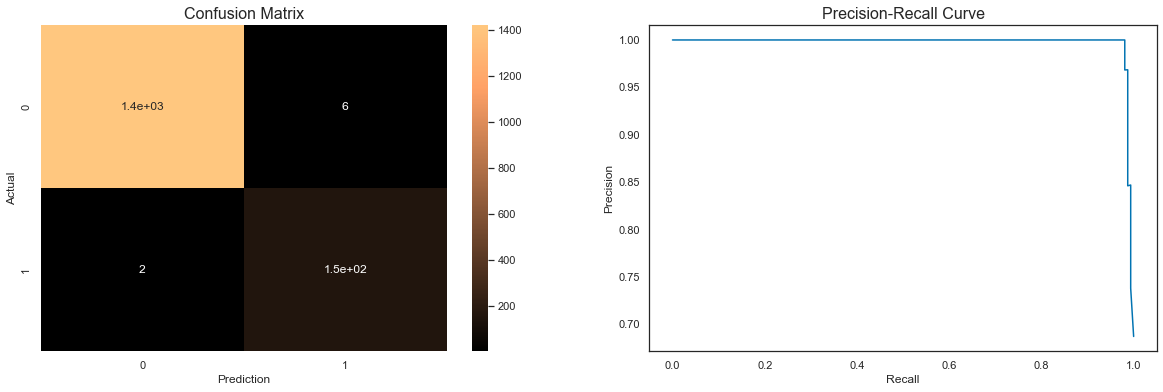

In [24]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc = classifier_rfc.predict_proba(X_test)[:, 1]
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_score_rfc)
ax[1].plot(recall_rfc, precision_rfc)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [25]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the scenario with no treatment is ' + str(auc(recall_rfc, precision_rfc)) + '.')

The AUC for the Random Forest Classifier in the scenario with no treatment is 0.9969723595476634.


### _K-Nearest Neighbor Classifier - First test_

In [26]:
# Training the model on the training set

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Predicting the test set results

y_pred_knn = classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [28]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)
print()
print('The accuracy of the K-Nearest Neighbors model is ' + str(accuracy_score(y_test, y_pred_knn)) + '.')

Confusion Matrix:
[[1424    1]
 [   6  150]]

The accuracy of the K-Nearest Neighbors model is 0.9955724225173941.


In [29]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_knn, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.99      0.96      0.98       156

    accuracy                           1.00      1581
   macro avg       0.99      0.98      0.99      1581
weighted avg       1.00      1.00      1.00      1581



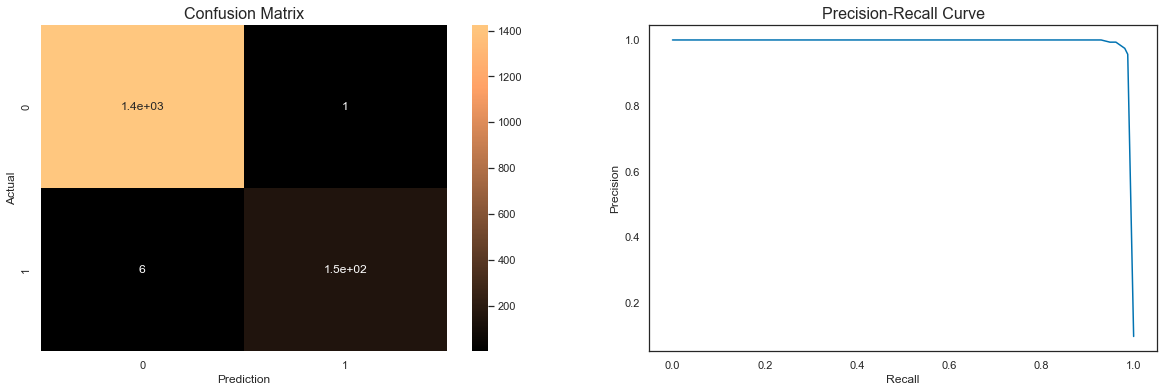

In [30]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn = classifier_knn.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_score_knn)
ax[1].plot(recall_knn, precision_knn)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [31]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is ' + str(auc(recall_knn, precision_knn)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is 0.9932638724779326.


## Plotting graphs: outliers, scale, distribution

Though Alzahrani and Sadaoui (2018b) mentioned in their report that no outliers were found in the dataset, they refer to outliers as values outside the range 0-1. However, outliers are defined as “sample values that lie very far away from the vast majority of the other sample values” (Triola, 2012, p. 46).

Through boxplots, it is possible to visualise 3 variables that have this type of distribution with values that lie far from the majority. They are: “Bidder_Tendency”, “Bidding_Ratio” and “Successive_Outbidding”. Because the latter has only 3 unique values and the majority of the values (around 87% of them) are 0.0, the other two values (0.5 and 1.0, approximately 7% and 6% each) are plotted as outliers.

As the dataset was pre-processed, cleaned and treated for the purpose of creating the clusters and defining the classes (Alzahrani and Sadaoui, 2018b), these entries identified in the boxplots as outliers will not be removed, as they might carry essential information to correctly flag suspicious activities.

When plotting histograms, it is observed that no attribute follows a normal distribution. A normal distribution has the following characteristics, according to Triola (2012, p. 50): “the distribution is approximately symmetric, with frequencies preceding the maximum being roughly a mirror image of those that follow the maximum”.

A single histogram was plotted for the dependent variable “Class” to take a closer look at its distribution. The graph is followed by the counts and percentages of each class: while Class 0 has 5646 entries, representing 89% of the total, Class 1 has only 675 entries, representing almost 11% of the total. 

Müller and Guido (2017, p. 277)  define imbalanced datasets or datasets with imbalanced classes as the ones where one class is much more frequent than the other and this can cause some types of errors. For instance, a common error is overfitting, which occurs when the performance on the test set is much worse than the performance on the training set (Harrison, 2019, p. 156). 

Vluymans (2019, pp. 3, 82) explains that in a two-class dataset, the imbalance ratio (IR) is defined as the ratio of the size of the majority class to the size of the minority class. The definition of IR implies that its value is greater than or equal to 1. When this value is equal to 1, it means that the dataset is perfectly balanced. Furthermore, the greater the value, the more imbalanced the dataset is. While IR = 1.5 is enough to consider the dataset as imbalanced, an IR = 9 is often used as the threshold above which datasets are regarded as highly imbalanced.

That said, it is possible to say that this dataset is close enough to be considered highly imbalanced, as its IR = 8.37. This issue will be dealt with later on.

Another histogram that was plotted again independently was the count of “Auction_Duration”. Here, it is observed that most auctions last for 7 days, while just a small portion of auctions last 10 days. Following this graph, two other histograms were plotted to observe the proportion of “Class” per “Auction_Duration”. While plotting it on a normal scale, it is not possible to see Class 1 in 10-day duration auctions. However, when we change the scale of the axis y for the log scale, it is possible to observe that there are a few entries for Class 1 that happened in 10-day duration auctions. 

As this is a classification problem, a cluster map was plotted instead of a regular heat map. The seaborn function for cluster map plots a dataset as a hierarchically-clustered heat map (Waskom, 2021). Even though it is not possible to analyse the relationship between the rows – as they are numerous, the main objective here is to explore how the attributes cluster with each other. It can be observed that the variable that clusters first with Class is “Successive_Outbidding”, then they both cluster with “Bidder_Tendency” and “Bidding_Ration”, which cluster with “Winning_Ratio” in the sequence, before clustering with the other major group.

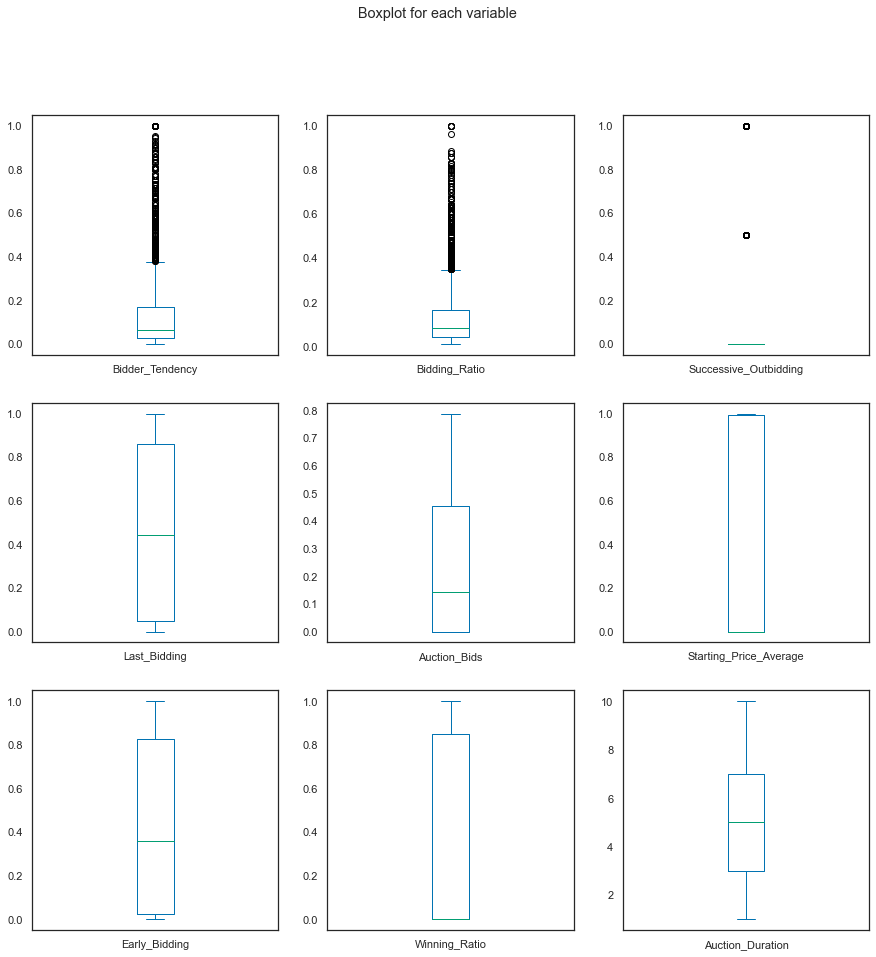

In [32]:
# Plotting boxplots to look for outliers

df2.drop('Class', axis = 1).plot(kind = 'box', subplots = True, layout = (3, 3), figsize = (15, 15), title = 'Boxplot for each variable')
plt.show();

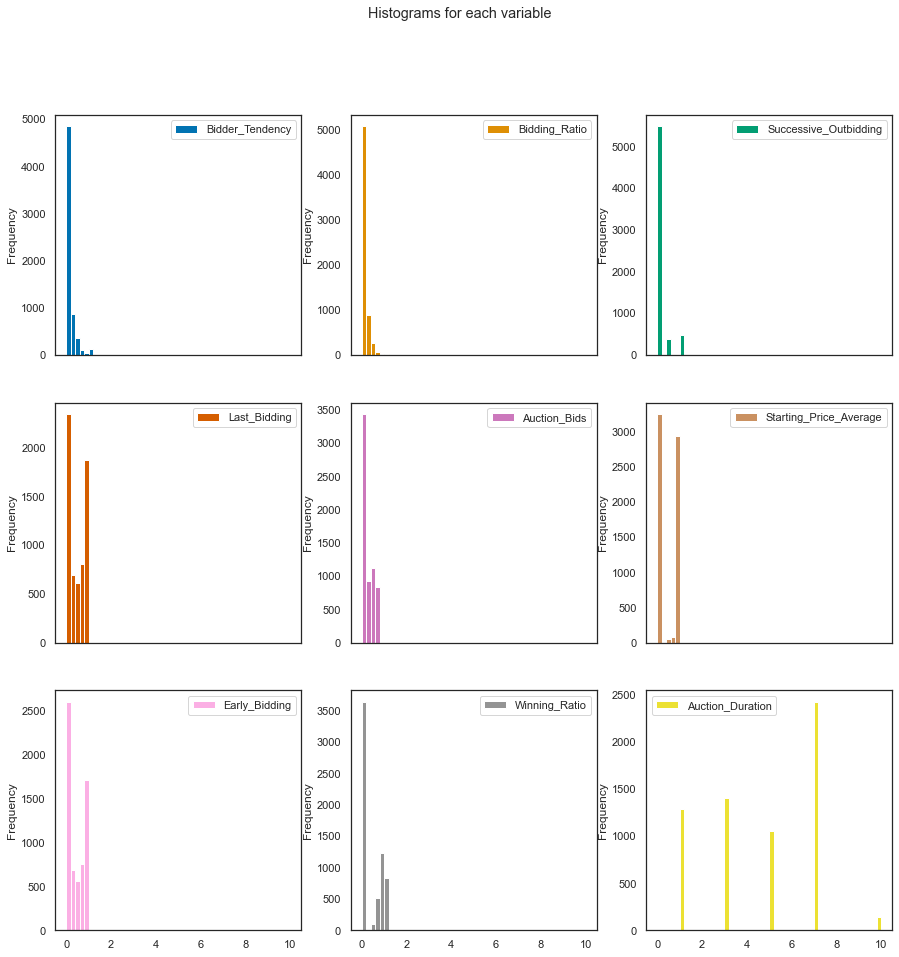

In [33]:
# Plotting histograms to look at the distribution of the attributes

df2.drop('Class', axis = 1).plot(kind = 'hist', subplots = True, layout = (3, 3), figsize = (15, 15), bins = 50, title = 'Histograms for each variable')
plt.show();

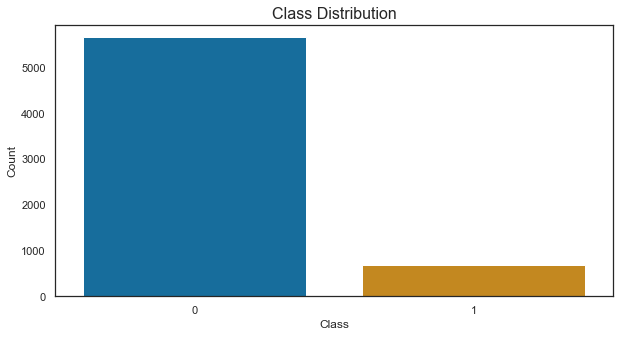

In [34]:
# Plotting a histogram to look at the distribuition of the dependent variable - "Class"

plt.figure(figsize = (10,5))
count = sns.countplot(x = 'Class', data = df2)
count.axes.set_title('Class Distribution', fontsize = 16)
count.set_xlabel('Class')
count.set_ylabel('Count');

In [35]:
# Counting values and percentages of Class variable

print("Counts:")
print(df2.Class.value_counts())
print()
print("Percentages:")
print(df2.Class.value_counts() / len(df2.Class)) 

Counts:
0    5646
1     675
Name: Class, dtype: int64

Percentages:
0    0.893213
1    0.106787
Name: Class, dtype: float64


In [36]:
# Imbalance Ratio {Size of majority class}/{Size of minority class}

print('Imbalanced Ratio:')
print(5645/675)

Imbalanced Ratio:
8.362962962962962


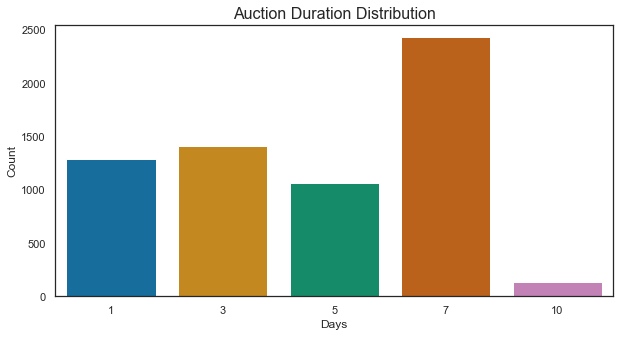

In [37]:
# Plotting a histogram to look at the distribuition of the variable - "Auction Duration"

plt.figure(figsize = (10,5))
count = sns.countplot(x = 'Auction_Duration', data = df2)
count.axes.set_title('Auction Duration Distribution',fontsize = 16)
count.set_xlabel('Days')
count.set_ylabel('Count');

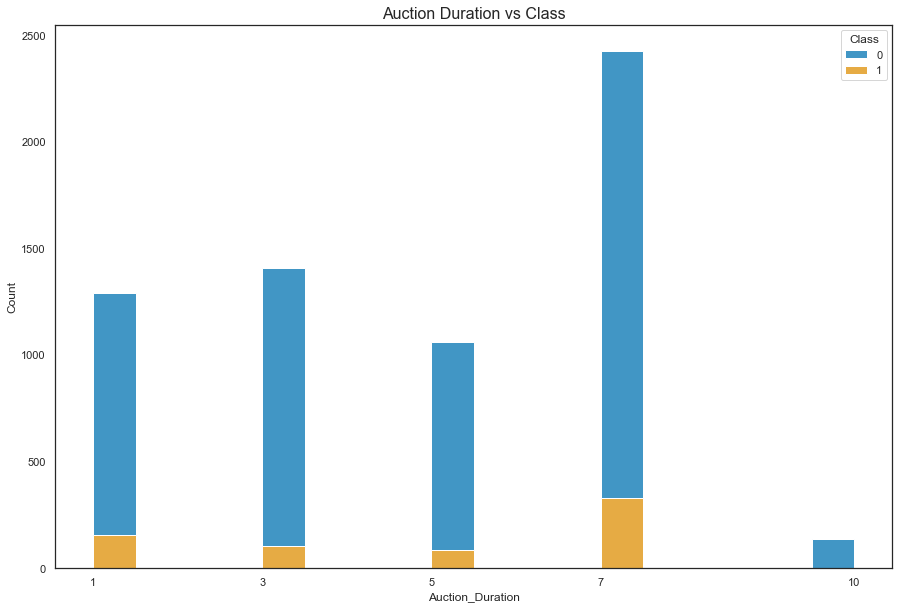

In [38]:
# Plotting a histogram to check the proportion of Classes per Auction Duration

plt.figure(figsize = (15,10))
aucdur_class = sns.histplot(binwidth = 0.5, x = 'Auction_Duration', hue = 'Class', data = df2, stat = 'count', multiple = 'stack')

aucdur_class.axes.set_title('Auction Duration vs Class',fontsize = 16)
aucdur_class.set_xticks([1, 3, 5, 7, 10]);

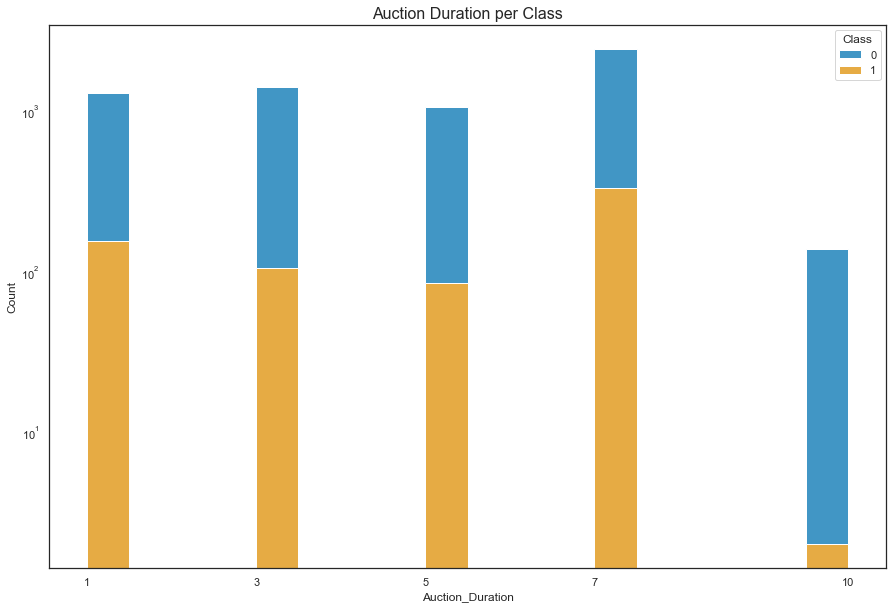

In [39]:
# Plotting a histogram to check the proportion of Classes per Auction Duration - log scale

plt.figure(figsize = (15,10))
aucdur_class = sns.histplot(binwidth = 0.5, x = 'Auction_Duration', hue = 'Class', data = df2, stat = 'count', multiple = 'stack', log_scale = (False, True))

aucdur_class.axes.set_title('Auction Duration per Class',fontsize = 16)
aucdur_class.set_xticks([1, 3, 5, 7, 10]);

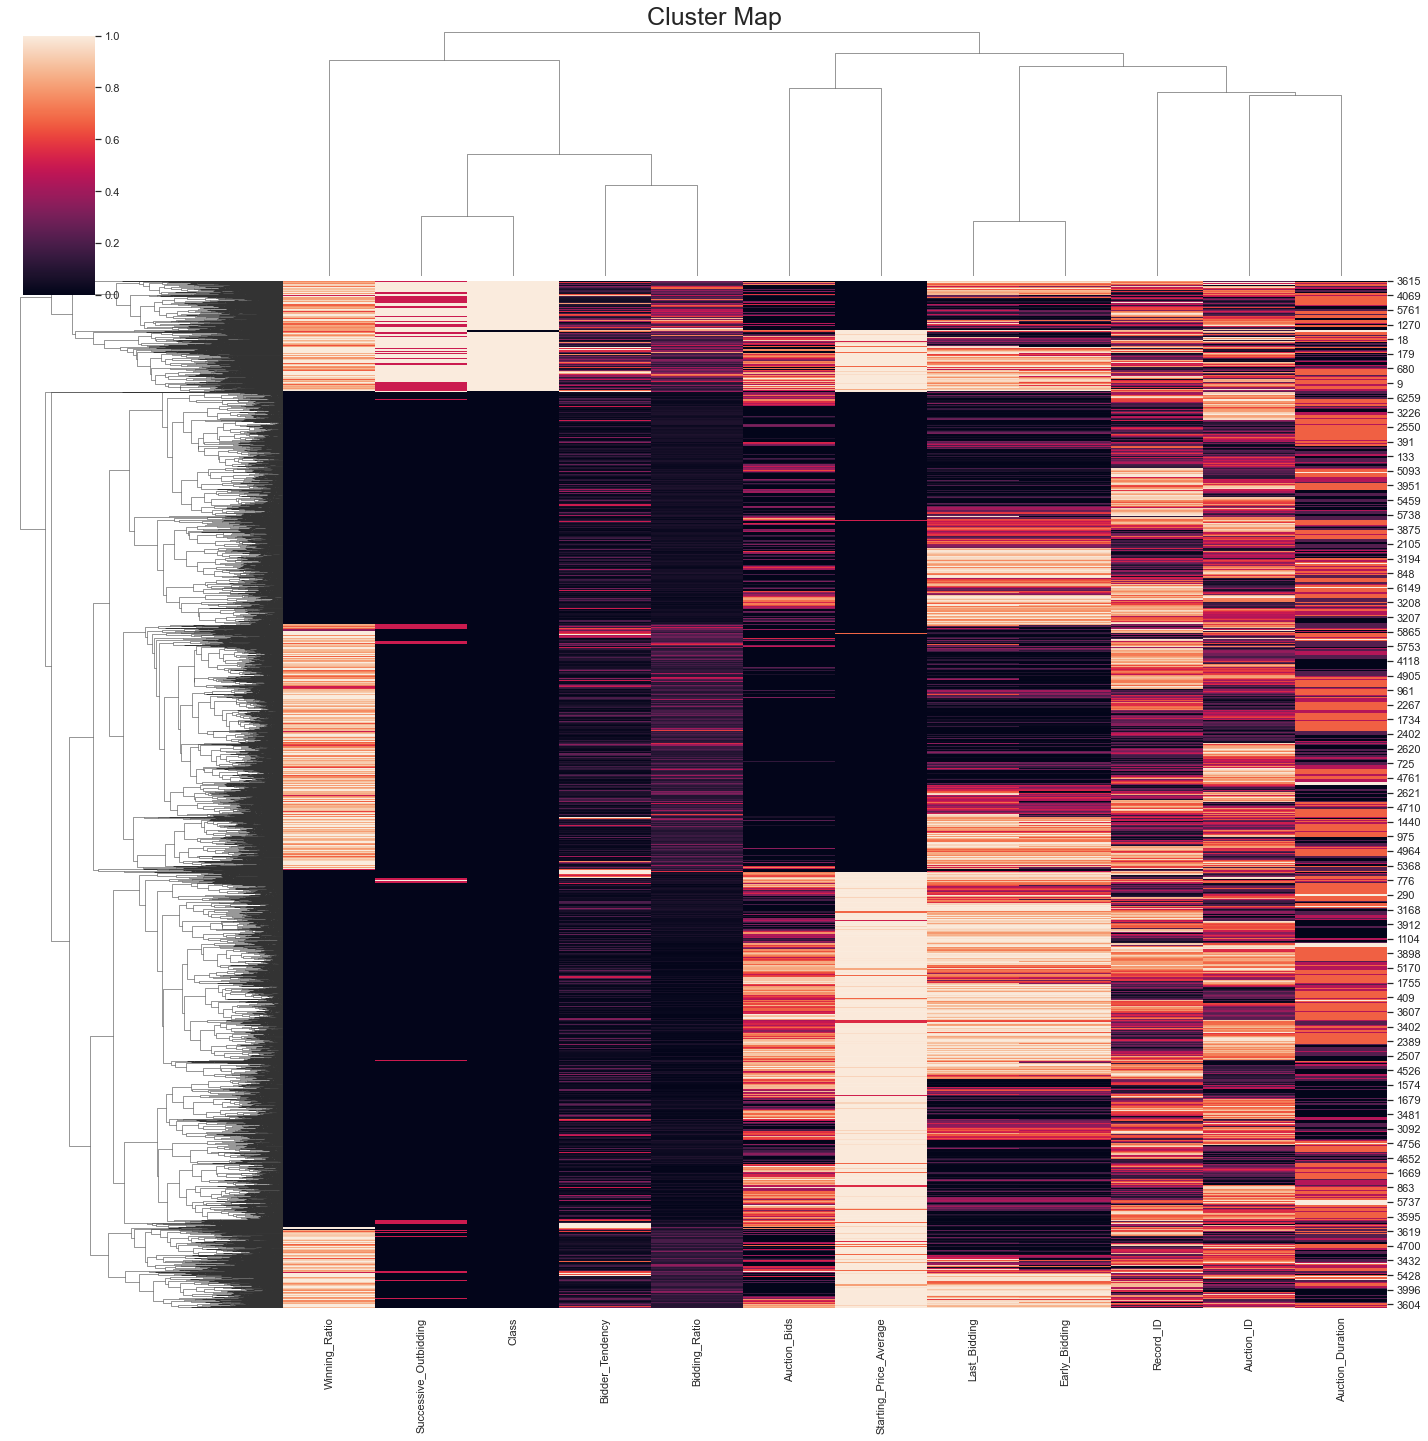

In [40]:
# Plotting a clustermap

df_cluster = sns.clustermap(df.drop('Bidder_ID', axis = 1), standard_scale = 1, figsize = (20, 20))
df_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

## Scaling the dataset

As the dataset is not sparse and no treatment will be applied to the outliers, the following step is putting the whole dataset on the same scale before balancing its distribution and applying any dimensionality reduction technique and models.

Géron (2019, p. 72) affirms that “one of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales”.

In this scenario of a dense dataset (not sparse), either StandardScaler or MinMaxScaler could be used. However, because all the independent variables except one are already inside the range 0-1, the MinMaxScaler was applied in this one feature: “Auction_Duration”. The MinMaxScaler "transforms features by scaling each feature to a given range" (Scikit-learn developers, 2022).

Géron (2019, p. 73) also explains that it is important to fit the scalers to the training data only. The test size was set as 25%. The scaler was, then, applied in the training set of the “Auction_Duration” variable only. Therefore, the whole training set is now in the same range.

In [41]:
# Scaling the variable "Auction_Duration" and assigning the result to a new dataset "df_scaled"

scaler = preproc.MinMaxScaler()
X[['Auction_Duration_SC']] = scaler.fit_transform(X[['Auction_Duration']])
X = X.drop('Auction_Duration', axis = 1)
df_scaled = X.join(y)
df_scaled.head(20)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,0.666667,0
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,0.666667,0
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,0.666667,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,0.666667,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,0.666667,1


In [42]:
# Splitting the scaled dataset


# Assigning the independet variables to a new dataset X

X_scaled = df_scaled.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y_scaled = df_scaled['Class']

## Balancing the dataset

There are two commom possibilities to balance a dataset that will be used here: oversample the minority class by creating synthetic data or undersample the majority class by deleting entries.

The main concern in regards to oversampling the dataset is that the synthetic data created could cause any type of bias in the fraud classification scenario, which is very delicate. On the other hand, undersampling would result in a dataset much smaller, with less than 1500 entries, which could mean not enough information for building machine learning models.

In this case, both techniques were applied in the training set in order to experiment, explore and compare their results.
SMOTE was the technique applied for oversampling the minority classes of the variable “Class” by creating synthetic examples and transforming the dataset into a new balanced version (Brownlee, 2021, pp. 124, 125). 

For undersampling, both classes were measured and with Numpy random.choice function, the majority class was reduced to the same size as the minority one.

After each technique, another cluster map was plotted and it is possible to see that the hierarchy of the clusters changed. In comparison to the original dataset, the first main cluster is different, grouping “Class”, “Successive_Outbidding” and “Winning_Ratio”, though it is the same cluster for undersampled and oversampled datasets. This difference is, most likely, a consequence of scaling the “Auction_Duration” variable. Nonetheless, while comparing the new datasets to each other, it is possible to see some differences in the second main cluster that groups all other attributes. Those differences were caused, in this case, by the different resampling techniques.

### Undersampling

In [43]:
# Preparing minority and majority classes for Random Undersampling

minority_class_len = len(df_scaled[df_scaled['Class'] == 1])
print('Minority class length is ' + str(minority_class_len) + '.')
print()

majority_class_len = len(df_scaled[df_scaled['Class'] == 0])
print('Majority class length is ' + str(majority_class_len) + '.')
print()

minority_class_ind = df_scaled[df_scaled['Class'] == 1].index
print('Minority class index is ')
print(minority_class_ind)
print()

majority_class_ind = df_scaled[df_scaled['Class'] == 0].index
print('Majority class index is ')
print(majority_class_ind)

Minority class length is 675.

Majority class length is 5646.

Minority class index is 
Int64Index([   7,    8,    9,   10,   13,   18,   23,   37,   41,   52,
            ...
            6263, 6266, 6267, 6278, 6280, 6284, 6285, 6289, 6295, 6316],
           dtype='int64', length=675)

Majority class index is 
Int64Index([   0,    1,    2,    3,    4,    5,    6,   11,   12,   14,
            ...
            6310, 6311, 6312, 6313, 6314, 6315, 6317, 6318, 6319, 6320],
           dtype='int64', length=5646)


In [44]:
# Randomly Undersampling the majority class

random_majority_ind = np.random.choice(majority_class_ind, minority_class_len, replace = False)
print('Majority class length is now ' + str(len(random_majority_ind)) + '.')

Majority class length is now 675.


In [45]:
# Concatenating minority class and undersampled majority class in a new dataset

df_scaled_us_ind = np.concatenate([minority_class_ind, random_majority_ind])
df_scaled_us = df_scaled.loc[df_scaled_us_ind]
df_scaled_us = df_scaled_us.reset_index()
df_scaled_us = df_scaled_us.drop('index', axis = 1)
df_scaled_us

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,0.666667,1
1,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,0.666667,1
2,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,0.666667,1
3,0.600000,0.562500,1.0,0.457631,0.000000,0.000000,0.457474,0.600000,0.666667,1
4,0.041322,0.208333,1.0,0.286045,0.250000,0.000000,0.286025,0.818182,0.666667,1
...,...,...,...,...,...,...,...,...,...,...
1345,0.043478,0.052632,0.0,0.957164,0.052632,0.993593,0.957164,0.000000,0.000000,0
1346,0.100000,0.047619,0.0,0.318142,0.142857,0.993593,0.318142,0.000000,0.666667,0
1347,0.009259,0.066667,0.0,0.002477,0.000000,0.000000,0.002477,0.000000,0.000000,0
1348,0.050000,0.062500,0.0,0.697412,0.000000,0.000000,0.697412,0.000000,0.444444,0


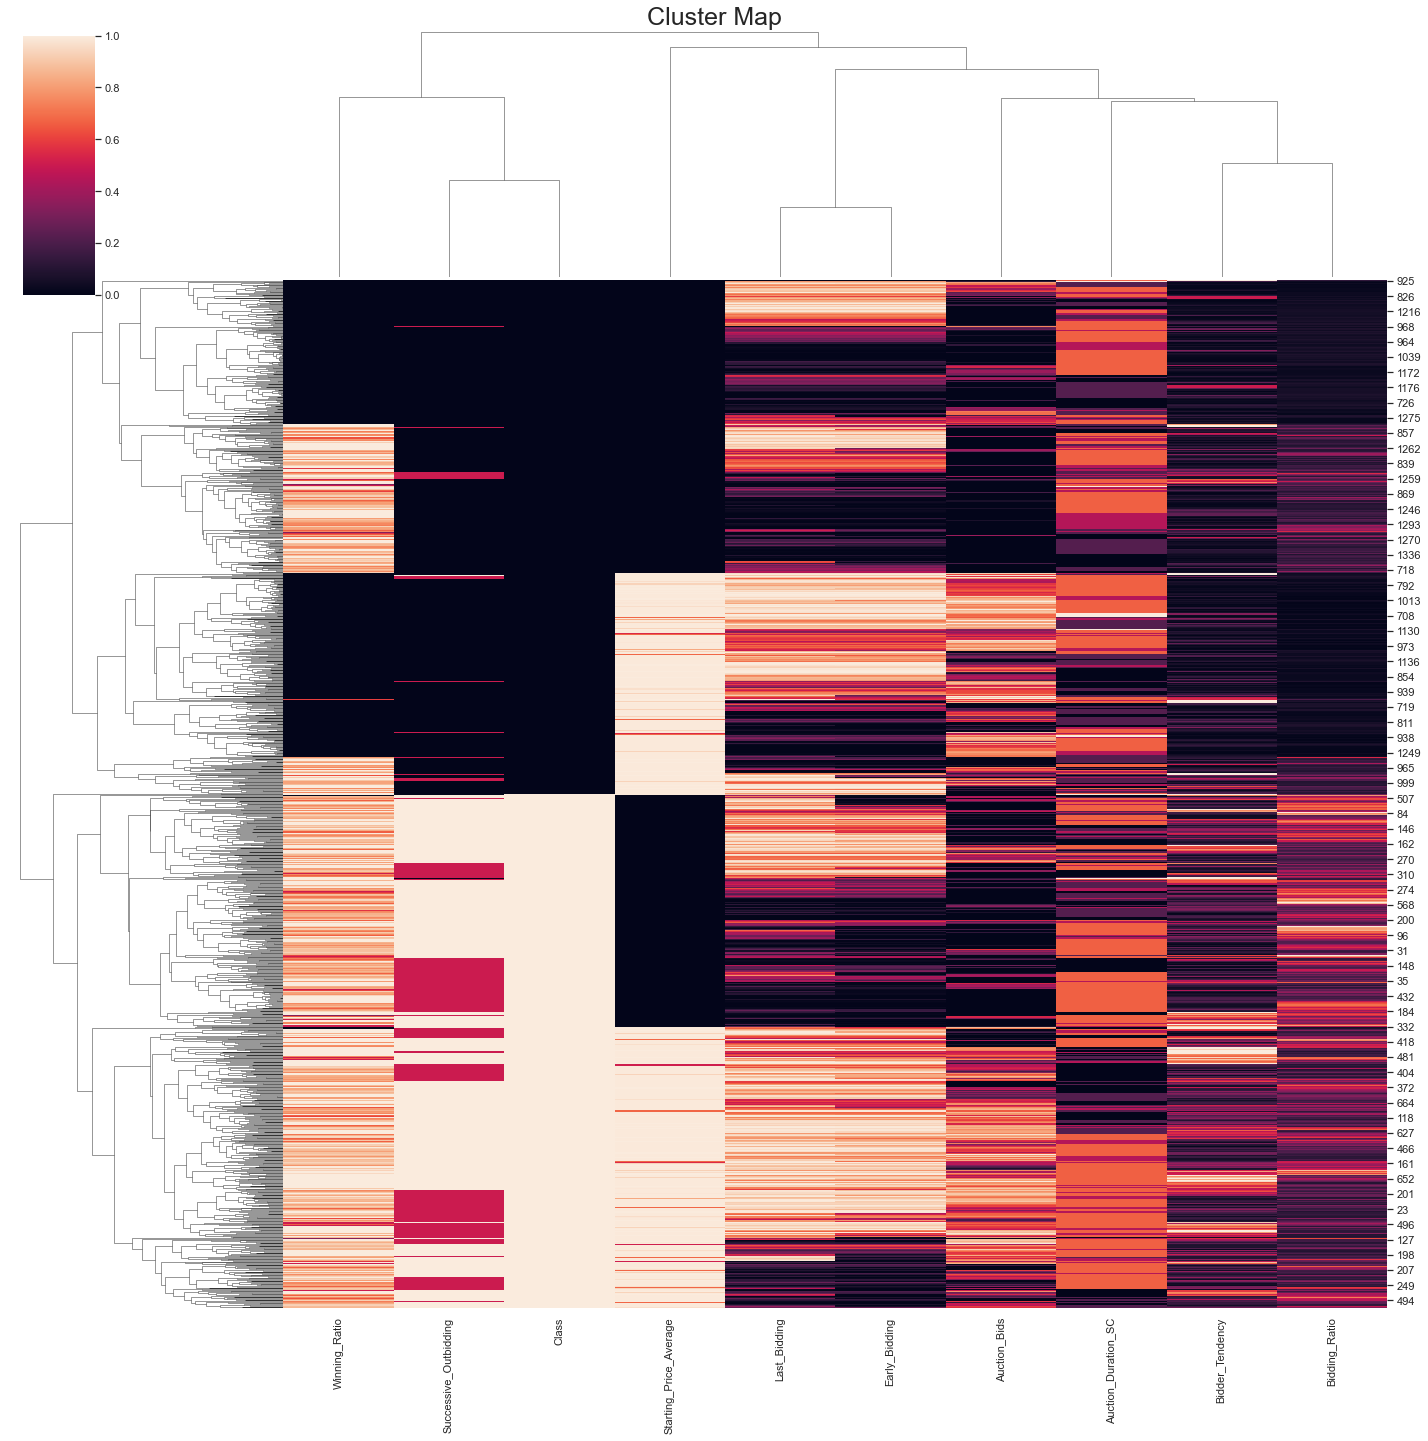

In [46]:
# Plotting a clustermap - scaled and undersampled

df_scaled_us_cluster = sns.clustermap(df_scaled_us, standard_scale = 1, figsize = (20, 20))
df_scaled_us_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

In [47]:
# Splitting the undersampled dataset


# Assigning the independet variables to a new dataset X

X_scaled_us = df_scaled_us.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y_scaled_us = df_scaled_us['Class']

### Oversampling

In [48]:
# Resampling the minority class

sm = SMOTE(sampling_strategy = 'auto', random_state = 42)

In [49]:
# Fitting the model to generate the data - oversampling

X_scaled_os, y_scaled_os = sm.fit_resample(X_scaled, y_scaled)
df_scaled_os = pd.concat([pd.DataFrame(X_scaled_os), pd.DataFrame(y_scaled_os)], axis = 1)
df_scaled_os

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration_SC,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0.444444,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0.444444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0.444444,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0.444444,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
11287,0.121052,0.120905,0.5,0.906801,0.590316,0.993593,0.906747,0.968687,0.597081,1
11288,0.280345,0.556158,1.0,0.353334,0.000000,0.000000,0.353286,0.704377,0.463711,1
11289,0.658713,0.477818,1.0,0.500343,0.120436,0.000000,0.490149,0.658713,0.666667,1
11290,0.028412,0.336017,1.0,0.010822,0.000000,0.000000,0.010756,0.871007,0.124412,1


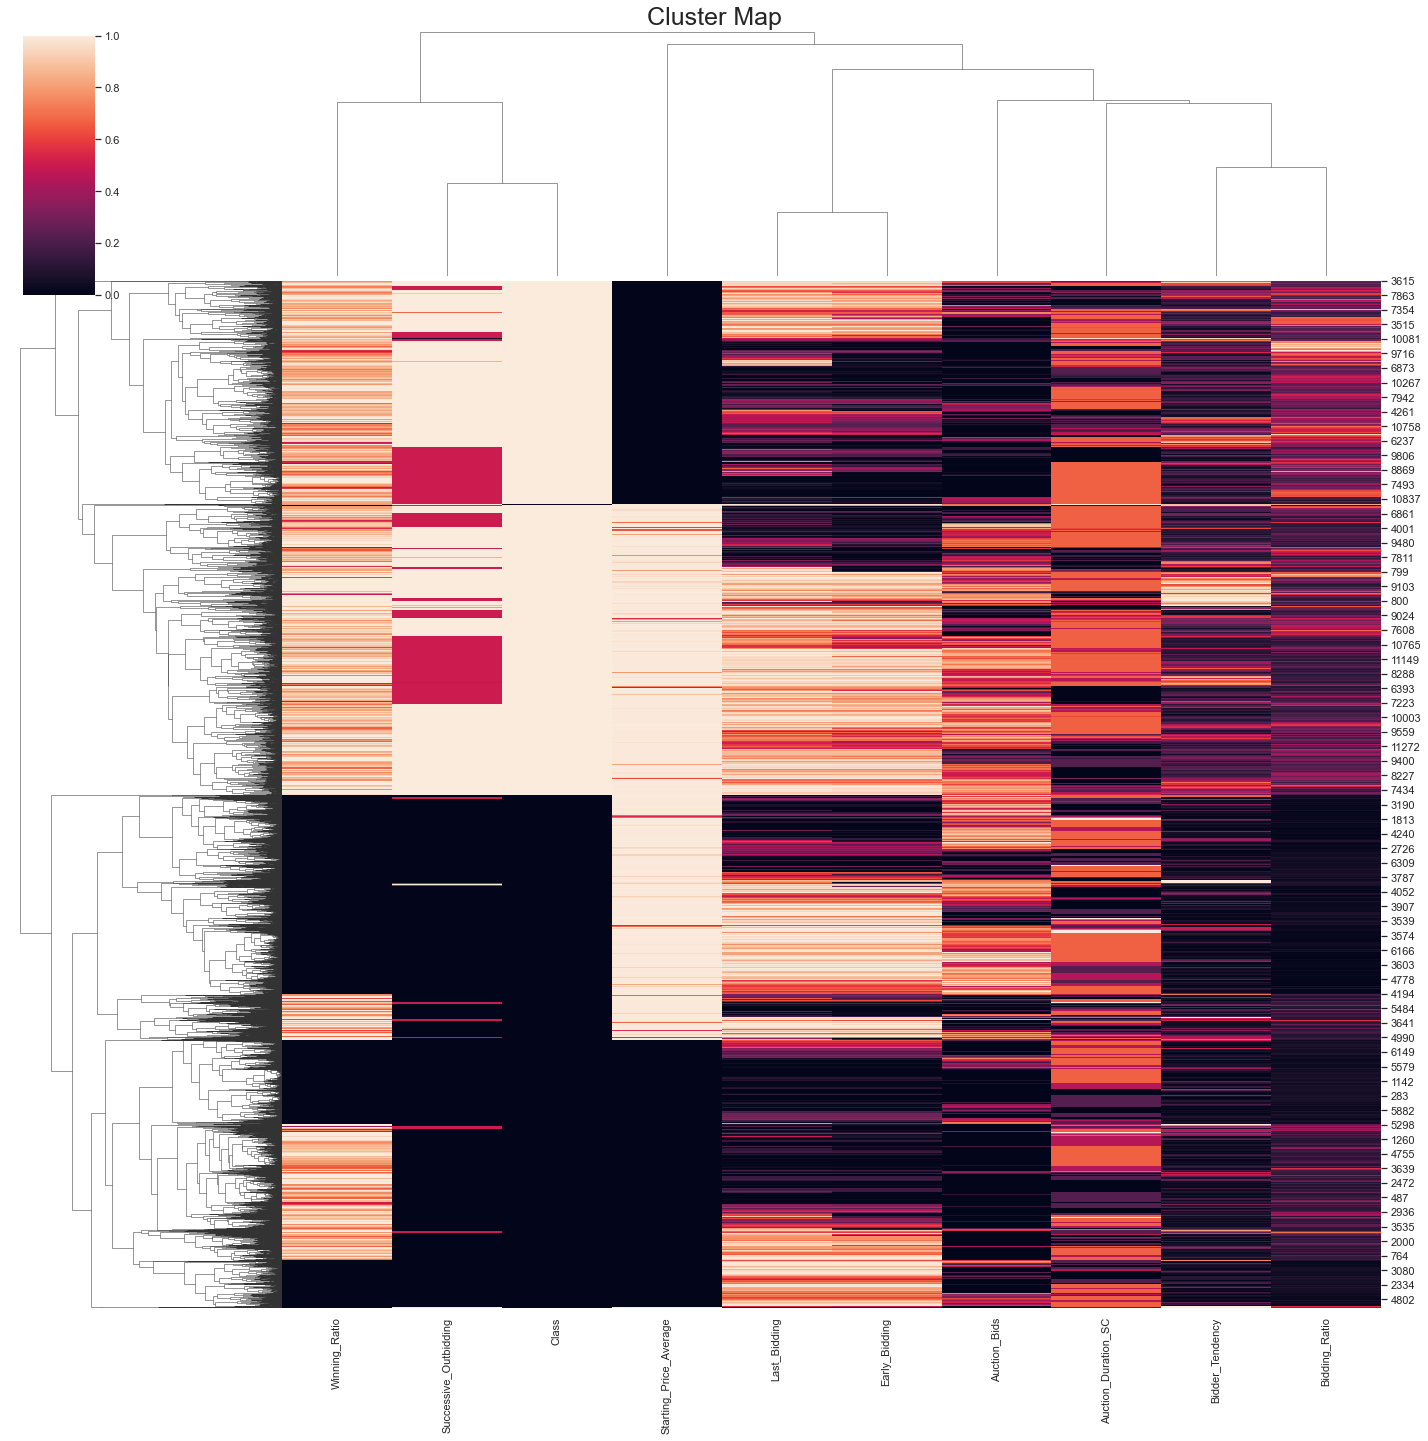

In [50]:
# Plotting a clustermap - scaled and oversampled

df_scaled_os_cluster = sns.clustermap(df_scaled_os, standard_scale = 1, figsize = (20, 20))
df_scaled_os_cluster.fig.suptitle('Cluster Map', x = 0.5, y = 1, fontsize = 25);

## Linear Discriminant Analysis and Principal Component Analysis

Before going into the details of both techniques, it is important to remember that each one was applied for both undersampled and oversampled dataset as exploring and comparing both sample sizes is the objective.

Linear discriminant is a common method used in statistics, pattern recognition, and machine learning. Its objective is to find a linear combination of features that are able to separate two or more classes that can also be used for dimensionality reduction. Linear discriminant analysis (LDA), a generalization of the linear discriminant, is primarily a supervised learning algorithm that seeks to maximize class discrimination while reduces a dataset dimension. (Mohammed, Badruddin Khan and Mohammed Bashier, 2017, p. 37 and 107).

Géron (2019, p. 235) also shares the same viewpoint that LDA is a classification algorithm that, during training, it learns the most discriminative axes between the classes. The author explains that LDA is also a good technique to reduce dimensionality before running another classification algorithm. 

The Principal Component Analysis (PCA) is used to reduce the dimensionality of the dataset to the minimum number of features as possible while maintaining the maximum variety, i.e., a more condensed dataset that will deliver the almost the same results as the original because it is focusing on its principal components.

PCA is the most popular dimensionality reduction algorithm that identifies the hyperplane that lies closest to the data and projects the data onto it. PCA identifies the axis or axes that accounts for the largest amount of variance in the training set, in descending order if more than one.  The explained variance ratio of each principal component indicates the proportion of the dataset’s variance that lies along the axis of each principal component. It is possible to arbitrarily choose the number of dimensions to reduce down to but it is also possible to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%)  (Géron, 2019, pp. 222, 223 and 225).

In regards to the application of PCA and LDA on both undersampled and oversampled training sets, it is possible to make some observations. 

For LDA, while class 0 is predominantly at the left side in the undersampled set, class 1 occupies the right side. In the oversampled set, class 0 is more spread over the axis X. It is also possible to see more concentrated clusters in the undersampled scenario.

As LDA returns a single component, the same amount is being applied for PCA. In both cases (PCA undersampled and oversampled), the explained variance ration for the first component is approximately 35%, which indicates that models will probably not achieve good results by using only one principal component. To achieve a variance of approximately 95%, though, a total of 6 components should be used instead.

It is, then, possible to infer that for the purpose of dimensionality reduction in this classification dataset, LDA achieves a much better result, not only resizing all the independent variables to a single one, but also producing more defined classes or clusters. Next, machine learning models will be applied in all four scenarios (LDA undersampled, LDA oversampled, PCA undersampled and PCA oversampled) to explore and compare the results.

In [51]:
# Linear Discriminant Analysis (LDA) - undersampled

X_train_scaled_us, X_test_scaled_us, y_train_scaled_us, y_test_scaled_us = train_test_split(X_scaled_us, y_scaled_us, test_size = 0.25, random_state = 42)

lda_us = LinearDiscriminantAnalysis()
X_lda_train_us = lda_us.fit_transform(X_train_scaled_us, y_train_scaled_us)
X_lda_test_us = lda_us.transform(X_test_scaled_us)
X_lda_train_us

array([[1.786 ],
       [2.997 ],
       [2.6308],
       ...,
       [2.5609],
       [1.7429],
       [1.7442]])

In [52]:
# LDA Explained Variance Ratio

lda_us.explained_variance_ratio_

array([1.])

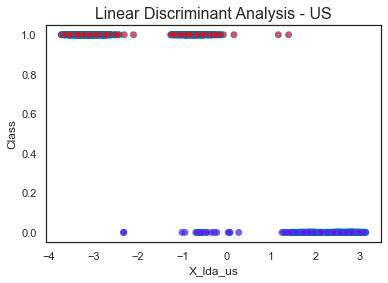

In [53]:
# LDA scatterplot - undersampled

plt.scatter(X_lda_train_us, y_train_scaled_us, c = y_train_scaled_us, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Linear Discriminant Analysis - US', fontsize = 16)
plt.xlabel('X_lda_us')
plt.ylabel('Class')
plt.show();

In [54]:
# Linear Discriminant Analysis (LDA) - oversampled

X_train_scaled_os, X_test_scaled_os, y_train_scaled_os, y_test_scaled_os = train_test_split(X_scaled_os, y_scaled_os, test_size = 0.25, random_state = 42)

lda_os = LinearDiscriminantAnalysis()
X_lda_train_os = lda_os.fit_transform(X_train_scaled_os, y_train_scaled_os)
X_lda_test_os = lda_os.transform(X_test_scaled_os)
X_lda_train_os

array([[-3.2595],
       [-0.8426],
       [-3.0243],
       ...,
       [ 2.2376],
       [ 2.6321],
       [-2.9398]])

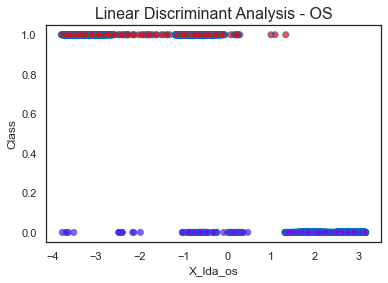

In [55]:
# LDA scatterplot - oversampled

plt.scatter(X_lda_train_os, y_train_scaled_os, c = y_train_scaled_os, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Linear Discriminant Analysis - OS', fontsize = 16)
plt.xlabel('X_lda_os')
plt.ylabel('Class')
plt.show();

In [56]:
# Principal Component Analysis (PCA) - for undersampled dataset

pca_us = PCA(n_components = 1, random_state = 42)
X_pca_train_us = pca_us.fit_transform(X_train_scaled_us)
X_pca_test_us = pca_us.fit_transform(X_test_scaled_us)

In [57]:
# PCA Explained Variance Ratio - undersampled

pca_us.explained_variance_ratio_

array([0.3609])

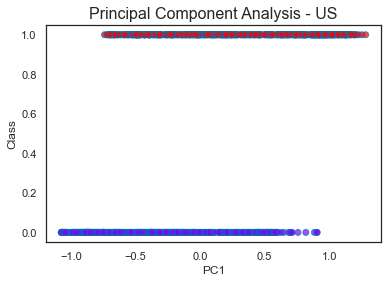

In [58]:
# PCA scatterplot - undersampled

plt.scatter(X_pca_train_us[:,0], y_train_scaled_us, c = y_train_scaled_us, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Principal Component Analysis - US', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class');

In [59]:
# Principal Component Analysis (PCA) - for oversampled dataset

pca_os = PCA(n_components = 1, random_state = 42)
X_pca_train_os = pca_os.fit_transform(X_train_scaled_os)
X_pca_test_os = pca_os.fit_transform(X_test_scaled_os)

In [60]:
# PCA Explained Variance Ratio - oversampled

pca_os.explained_variance_ratio_

array([0.3479])

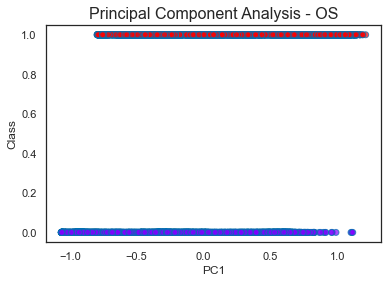

In [61]:
# PCA scatterplot - oversampled

plt.scatter( X_pca_train_os[:,0], y_train_scaled_os, c = y_train_scaled_os, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.title('Principal Component Analysis - OS', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('Class');

# Modelling

Alzahrani and Sadaoui (2018a) scrapped and pre-processed this dataset, and also applied unsupervised learning algorithms, like K-Mean clustering, to label the data. Furthermore, in his thesis, Alzahrani (2019), explains that “to implement robust binary classification models, the training instances must be efficiently categorized. So, another aim of this study is to create a labelled SB dataset for SB detection systems based on classification techniques.” Thus, because the dataset is already labelled, classification algorithms will be used in this current analysis, as suggested.

Classification is a typical supervised learning task and two of the most important supervised learning algorithms are Random Forest (RF) and K-Nearest Neighbors (KNN) (Géron, 2019, pp. 8 and 9). Those are the two models that are going to be used in this analysis.

A random forest is an ensemble of decision trees which uses bagging to correct the tendency of decision trees to overfit. The random forest has been an excellent tool for both classification and regression and does not require pre-processing of the data (Harrison, 2019, pp. 127 and 128). Despite its simplicity, Random Forest is one of the most powerful ML models (Géron, 2019, p. 191). 

“The K-Nearest Neighbors (KNN) algorithm classifies based on distance to some number (k) of training samples. The algorithm family is called instance-based learning as there are no parameters to learn” (Harrison, 2019, p. 116).
The two main concerns about this algorithm are selecting the appropriate k value and the curse of dimensionality. The latter can hamper distance metrics as there is little difference in high dimensions between nearest and farthest neighbor. This model performs better when the data is standardised and, in order to prevent overfitting, the number of neighbors can be raised (Harrison, 2019, pp. 116 and 117).

The main measures used to compare all the scenarios results was the Area Under Curve (AUC) for Precision-Recall (PR). A brief understanding of the scores: “precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples” (Scikit-learn developers, 2022). It is also explained by Scikit-learn developers (2022) that the PR curve computes “the curve from the ground truth label and a score given by the classifier by varying a decision threshold”. This PR curve is restricted for binary classification cases like the SB one.

The SB dataset is a high-quality one based on reliable SB strategies (Alzahrani, 2019) and, because of that, the models were tested on the dataset before scaling it and balancing it, in order to compare these results with the ones after scaling, balancing and reducing the dimension of the dataset. The results of those tests already achieved excellent levels, with AUC of 99.69% for RF and 99.32% for KNN.

RF is being applied with parameters random state equal to 42 and criterion set to entropy. Most of the time, the criterion set to gini or entropy does not make a big difference (Géron, 2019, p. 184). KNN is being applied with the same random state and all other parameters are the default ones. After the analysis of all AUC results, GridSearchCV will be applied in the best one in order to find the best hyperparameters.

The parameters or hyperparameters control how the models behave and, by varying their values, the performance of the models change. The right hyperparameters help the model to achieve better results. Sklearn has a grid search class (GridSearchCV) to evaluate a model with different combinations of parameters and return the best one (Harrison, 2019, p. 34).

Comparing the application of the RF in the last four scenarios (LDA undersampled, LDA oversampled, PCA undersampled and PCA oversampled), it is observed that the model had a better result in the LDA oversampled case, reaching an AUC of 99.31% but still lower than the first test. The results for PCA both under and oversampled were surprisingly good, considering that only one principal component is being used: AUC of 64.13% and 69.35%, respectively.

Comparing the application of the KNN model in the last four scenarios (LDA undersampled, LDA oversampled, PCA undersampled and PCA oversampled), it is possible to affirm that the best result was achieved in the scenario of LDA oversampled, with AUC reaching 99.35% a slightly bigger value than the first test, but still not higher than the best result for RF. The results for PCA follow the same patterns as in RF: AUC of 64.09% for undersampled and 69.68% for oversampled.

GridSearchCV was then applied in the scenario with the best result: RF with the dataset without treatments. For the range of parameters offered, including the scoring defined as AUC, GridSearchCV pointed the following as the best ones: criterion = gini, max_depth = 3, max_features = auto and n_estimators = 100.

The final result with the RF model applied with those hyperparameters in the dataset with no treatment is an AUC of 98.77%. Though the result looks worse than the original, it can be considered more accurate, thus more reliable, because of the cross-validation executed.

## Random Forest Classifier - LDA undersampled

In [62]:
# Training the model on the training set (LDA undersampled)

classifier_rfc1 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc1.fit(X_lda_train_us, y_train_scaled_us)

RandomForestClassifier(criterion='entropy', random_state=42)

In [63]:
# Predicting the test set results

y_pred_rfc1 = classifier_rfc1.predict(X_lda_test_us)
print(np.concatenate((y_pred_rfc1.reshape(len(y_pred_rfc1),1), y_test_scaled_us.values.reshape(len(y_test_scaled_us),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]

In [64]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc1 = confusion_matrix(y_test_scaled_us, y_pred_rfc1)
print('Confusion Matrix:')
print(cm_rfc1)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(accuracy_score(y_test_scaled_us, y_pred_rfc1)) + '.')

Confusion Matrix:
[[168   3]
 [  5 162]]

The accuracy of the Random Forest Classifier model is 0.9763313609467456.


In [65]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_rfc1, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98       171
     Class 1       0.98      0.97      0.98       167

    accuracy                           0.98       338
   macro avg       0.98      0.98      0.98       338
weighted avg       0.98      0.98      0.98       338



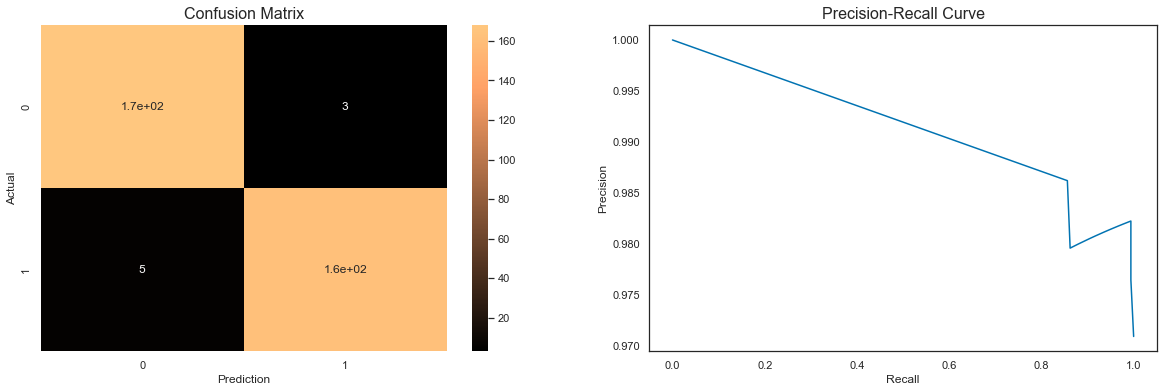

In [66]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc1, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc1 = classifier_rfc1.predict_proba(X_lda_test_us)[:, 1]
precision_rfc1, recall_rfc1, _ = precision_recall_curve(y_test_scaled_us, y_score_rfc1)
ax[1].plot(recall_rfc1, precision_rfc1)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [67]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the LDA undersampled scenario is ' + str(auc(recall_rfc1, precision_rfc1)) + '.')

The AUC for the Random Forest Classifier in the LDA undersampled scenario is 0.9913292072990074.


## Random Forest Classifier - LDA oversampled

In [68]:
# Training the model on the training set (LDA oversampled)

X_train_scaled_us, X_test_scaled_us, y_train_scaled_us, y_test_scaled_us = train_test_split(X_scaled_us, y_scaled_us, test_size = 0.25, random_state = 42)

lda_us = LinearDiscriminantAnalysis()
X_lda_train_us = lda_us.fit_transform(X_train_scaled_us, y_train_scaled_us)
X_lda_test_us = lda_us.transform(X_test_scaled_us)
X_lda_train_us

classifier_rfc2 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc2.fit(X_lda_train_os, y_train_scaled_os)

RandomForestClassifier(criterion='entropy', random_state=42)

In [69]:
# Predicting the test set results

y_pred_rfc2 = classifier_rfc2.predict(X_lda_test_os)
print(np.concatenate((y_pred_rfc2.reshape(len(y_pred_rfc2),1), y_test_scaled_os.values.reshape(len(y_test_scaled_os),1)),1))

[[0 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [70]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc2 = confusion_matrix(y_test_scaled_os, y_pred_rfc2)
print('Confusion Matrix:')
print(cm_rfc2)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(accuracy_score(y_test_scaled_os, y_pred_rfc2)) + '.')

Confusion Matrix:
[[1396   24]
 [  39 1364]]

The accuracy of the Random Forest Classifier model is 0.9776833156216791.


In [71]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_rfc2, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      1420
     Class 1       0.98      0.97      0.98      1403

    accuracy                           0.98      2823
   macro avg       0.98      0.98      0.98      2823
weighted avg       0.98      0.98      0.98      2823



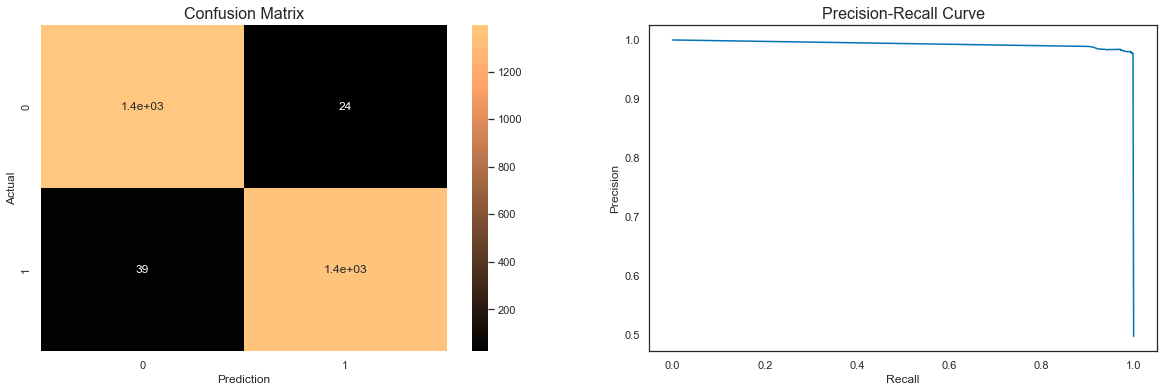

In [72]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc2, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc2 = classifier_rfc2.predict_proba(X_lda_test_os)[:, 1]
precision_rfc2, recall_rfc2, _ = precision_recall_curve(y_test_scaled_os, y_score_rfc2)
ax[1].plot(recall_rfc2, precision_rfc2)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [73]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the LDA oversampled scenario is ' + str(auc(recall_rfc2, precision_rfc2)) + '.')

The AUC for the Random Forest Classifier in the LDA oversampled scenario is 0.9931085673105574.


## Random Forest Classifier - PCA undersampled

In [74]:
# Training the model on the training set (PCA undersampled)

classifier_rfc3 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc3.fit(X_pca_train_us, y_train_scaled_us)

RandomForestClassifier(criterion='entropy', random_state=42)

In [75]:
# Predicting the test set results

y_pred_rfc3 = classifier_rfc3.predict(X_pca_test_us)
print(np.concatenate((y_pred_rfc3.reshape(len(y_pred_rfc3),1), y_test_scaled_us.values.reshape(len(y_test_scaled_us),1)),1))

[[0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]

In [76]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc3 = confusion_matrix(y_test_scaled_us, y_pred_rfc3)
print('Confusion Matrix:')
print(cm_rfc3)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(accuracy_score(y_test_scaled_us, y_pred_rfc3)) + '.')

Confusion Matrix:
[[101  70]
 [ 68  99]]

The accuracy of the Random Forest Classifier model is 0.591715976331361.


In [77]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_rfc3, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.60      0.59      0.59       171
     Class 1       0.59      0.59      0.59       167

    accuracy                           0.59       338
   macro avg       0.59      0.59      0.59       338
weighted avg       0.59      0.59      0.59       338



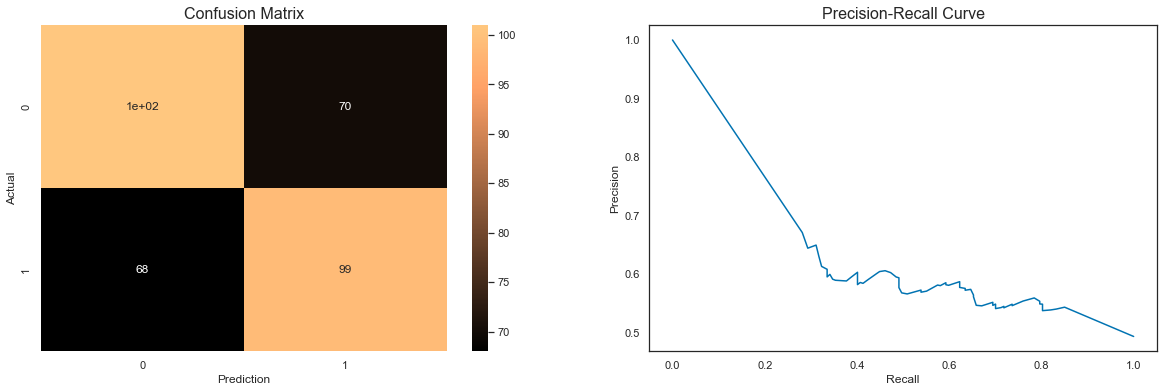

In [78]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc3, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc3 = classifier_rfc3.predict_proba(X_pca_test_us)[:, 1]
precision_rfc3, recall_rfc3, _ = precision_recall_curve(y_test_scaled_us, y_score_rfc3)
ax[1].plot(recall_rfc3, precision_rfc3)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [79]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the PCA undersampled scenario is ' + str(auc(recall_rfc3, precision_rfc3)) + '.')

The AUC for the Random Forest Classifier in the PCA undersampled scenario is 0.6413406218824635.


## Random Forest Classifier - PCA oversampled

In [80]:
# Training the model on the training set (PCA oversampled)

classifier_rfc4 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc4.fit(X_pca_train_os, y_train_scaled_os)

RandomForestClassifier(criterion='entropy', random_state=42)

In [81]:
# Predicting the test set results

y_pred_rfc4 = classifier_rfc4.predict(X_pca_test_os)
print(np.concatenate((y_pred_rfc4.reshape(len(y_pred_rfc4),1), y_test_scaled_os.values.reshape(len(y_test_scaled_os),1)),1))

[[0 1]
 [0 0]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [82]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc4 = confusion_matrix(y_test_scaled_os, y_pred_rfc4)
print('Confusion Matrix:')
print(cm_rfc4)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(accuracy_score(y_test_scaled_os, y_pred_rfc4)) + '.')

Confusion Matrix:
[[858 562]
 [539 864]]

The accuracy of the Random Forest Classifier model is 0.6099893730074389.


In [83]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_rfc4, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.61      0.60      0.61      1420
     Class 1       0.61      0.62      0.61      1403

    accuracy                           0.61      2823
   macro avg       0.61      0.61      0.61      2823
weighted avg       0.61      0.61      0.61      2823



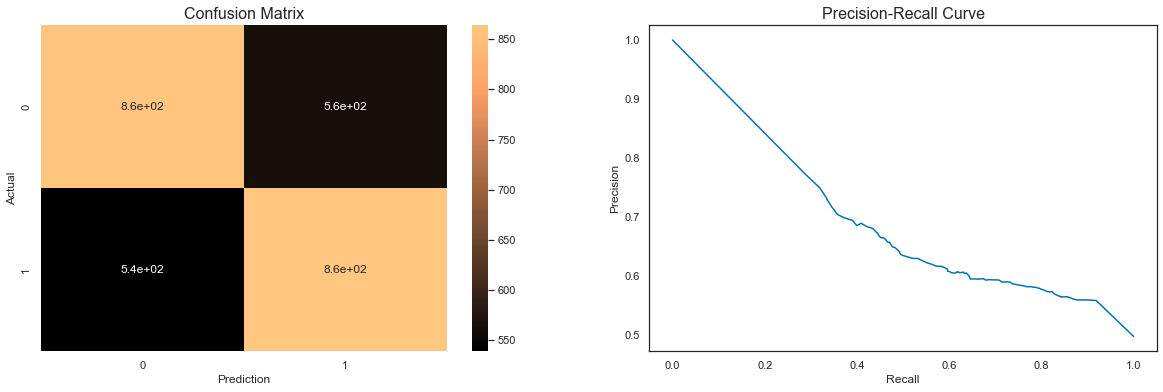

In [84]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc4, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc4 = classifier_rfc4.predict_proba(X_pca_test_os)[:, 1]
precision_rfc4, recall_rfc4, _ = precision_recall_curve(y_test_scaled_os, y_score_rfc4)
ax[1].plot(recall_rfc4, precision_rfc4)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [85]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the PCA oversampled scenario is ' + str(auc(recall_rfc4, precision_rfc4)) + '.')

The AUC for the Random Forest Classifier in the PCA oversampled scenario is 0.6935641712282703.


## K-Nearest Neighbor Classifier - LDA undersampled

In [86]:
# Training the model on the training set (LDA undersampled)

classifier_knn1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn1.fit(X_lda_train_us, y_train_scaled_us)

KNeighborsClassifier()

In [87]:
# Predicting the test set results

y_pred_knn1 = classifier_knn1.predict(X_lda_test_us)
print(np.concatenate((y_pred_knn1.reshape(len(y_pred_knn1),1), y_test_scaled_us.values.reshape(len(y_test_scaled_us),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]

In [88]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn1 = confusion_matrix(y_test_scaled_us, y_pred_knn1)
print('Confusion Matrix:')
print(cm_knn1)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(accuracy_score(y_test_scaled_us, y_pred_knn1)) + '.')

Confusion Matrix:
[[168   3]
 [  2 165]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.985207100591716.


In [89]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_knn1, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99       171
     Class 1       0.98      0.99      0.99       167

    accuracy                           0.99       338
   macro avg       0.99      0.99      0.99       338
weighted avg       0.99      0.99      0.99       338



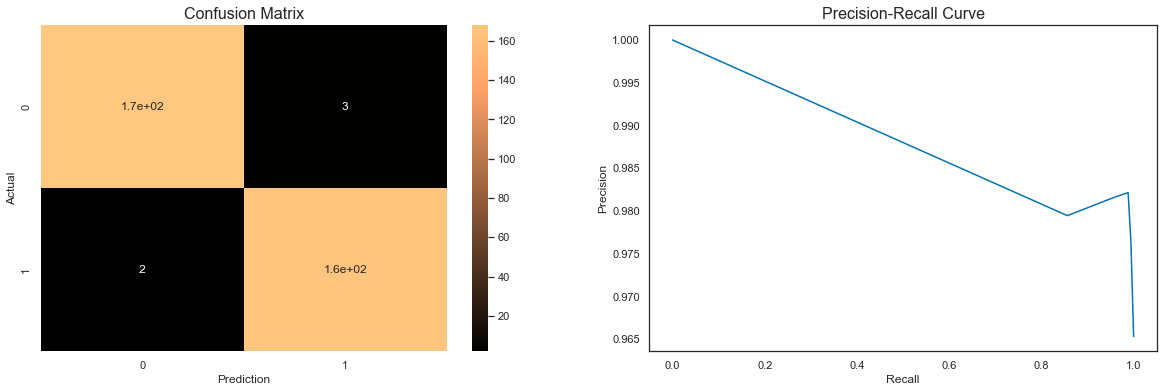

In [90]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn1, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn1 = classifier_knn1.predict_proba(X_lda_test_us)[:, 1]
precision_knn1, recall_knn1, _ = precision_recall_curve(y_test_scaled_us, y_score_knn1)
ax[1].plot(recall_knn1, precision_knn1)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [91]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the LDA undersampled scenario is ' + str(auc(recall_knn1, precision_knn1)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the LDA undersampled scenario is 0.9883788533834312.


## K-Nearest Neighbor Classifier - LDA oversampled

In [92]:
# Training the model on the training set (LDA oversampled)

classifier_knn2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn2.fit(X_lda_train_os, y_train_scaled_os)

KNeighborsClassifier()

In [93]:
# Predicting the test set results

y_pred_knn2 = classifier_knn2.predict(X_lda_test_os)
print(np.concatenate((y_pred_knn2.reshape(len(y_pred_knn2),1), y_test_scaled_os.values.reshape(len(y_test_scaled_os),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [94]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn2 = confusion_matrix(y_test_scaled_os, y_pred_knn2)
print('Confusion Matrix:')
print(cm_knn2)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(accuracy_score(y_test_scaled_os, y_pred_knn2)) + '.')

Confusion Matrix:
[[1394   26]
 [   6 1397]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.9886645412681544.


In [95]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_knn2, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99      1420
     Class 1       0.98      1.00      0.99      1403

    accuracy                           0.99      2823
   macro avg       0.99      0.99      0.99      2823
weighted avg       0.99      0.99      0.99      2823



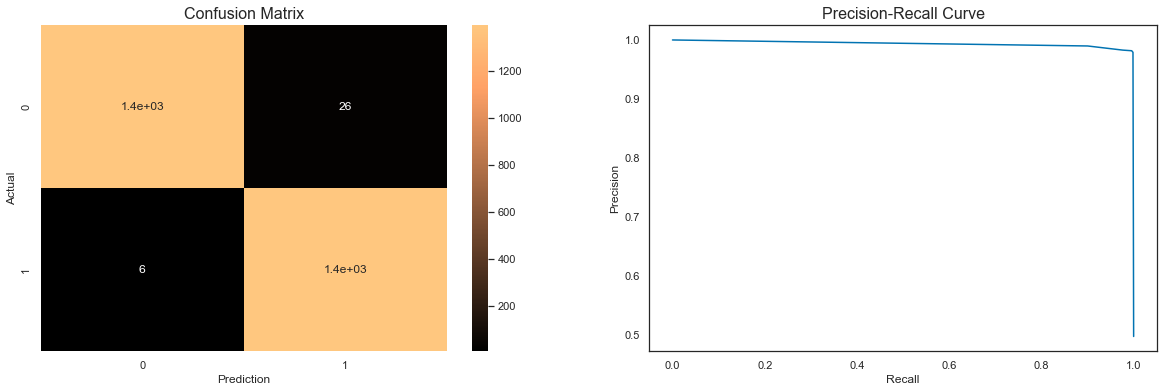

In [96]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn2, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn2 = classifier_knn2.predict_proba(X_lda_test_os)[:, 1]
precision_knn2, recall_knn2, _ = precision_recall_curve(y_test_scaled_os, y_score_knn2)
ax[1].plot(recall_knn2, precision_knn2)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [97]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the LDA oversampled scenario is ' + str(auc(recall_knn2, precision_knn2)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the LDA oversampled scenario is 0.9935959567719549.


## K-Nearest Neighbor Classifier - PCA undersampled

In [98]:
# Training the model on the training set (PCA undersampled)

classifier_knn3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn3.fit(X_pca_train_us, y_train_scaled_us)

KNeighborsClassifier()

In [99]:
# Predicting the test set results

y_pred_knn3 = classifier_knn3.predict(X_pca_test_us)
print(np.concatenate((y_pred_knn3.reshape(len(y_pred_knn3),1), y_test_scaled_us.values.reshape(len(y_test_scaled_us),1)),1))

[[0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]

In [100]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn3 = confusion_matrix(y_test_scaled_us, y_pred_knn3)
print('Confusion Matrix:')
print(cm_knn3)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(accuracy_score(y_test_scaled_us, y_pred_knn3)) + '.')

Confusion Matrix:
[[99 72]
 [68 99]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.5857988165680473.


In [101]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_us, y_pred_knn3, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.59      0.58      0.59       171
     Class 1       0.58      0.59      0.59       167

    accuracy                           0.59       338
   macro avg       0.59      0.59      0.59       338
weighted avg       0.59      0.59      0.59       338



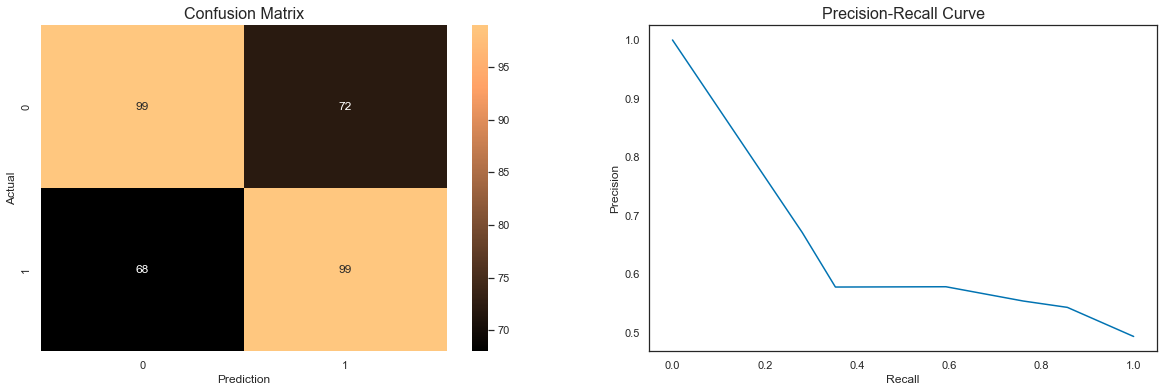

In [102]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn3, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn3 = classifier_knn3.predict_proba(X_pca_test_us)[:, 1]
precision_knn3, recall_knn3, _ = precision_recall_curve(y_test_scaled_us, y_score_knn3)
ax[1].plot(recall_knn3, precision_knn3)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [103]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the PCA undersampled scenario is ' + str(auc(recall_knn3, precision_knn3)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the PCA undersampled scenario is 0.6409279115559743.


## K-Nearest Neighbor Classifier - PCA oversampled

In [104]:
# Training the model on the training set (PCA undersampled)

classifier_knn4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn4.fit(X_pca_train_os, y_train_scaled_os)

KNeighborsClassifier()

In [105]:
# Predicting the test set results

y_pred_knn4 = classifier_knn4.predict(X_pca_test_os)
print(np.concatenate((y_pred_knn4.reshape(len(y_pred_knn4),1), y_test_scaled_os.values.reshape(len(y_test_scaled_os),1)),1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [106]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn4 = confusion_matrix(y_test_scaled_os, y_pred_knn4)
print('Confusion Matrix:')
print(cm_knn4)
print()
print('The accuracy of the K-Nearest Neighbors Classifier model is ' + str(accuracy_score(y_test_scaled_os, y_pred_knn4)) + '.')

Confusion Matrix:
[[843 577]
 [524 879]]

The accuracy of the K-Nearest Neighbors Classifier model is 0.6099893730074389.


In [107]:
# Printing a report of all scores for the model

print(classification_report(y_test_scaled_os, y_pred_knn4, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.62      0.59      0.60      1420
     Class 1       0.60      0.63      0.61      1403

    accuracy                           0.61      2823
   macro avg       0.61      0.61      0.61      2823
weighted avg       0.61      0.61      0.61      2823



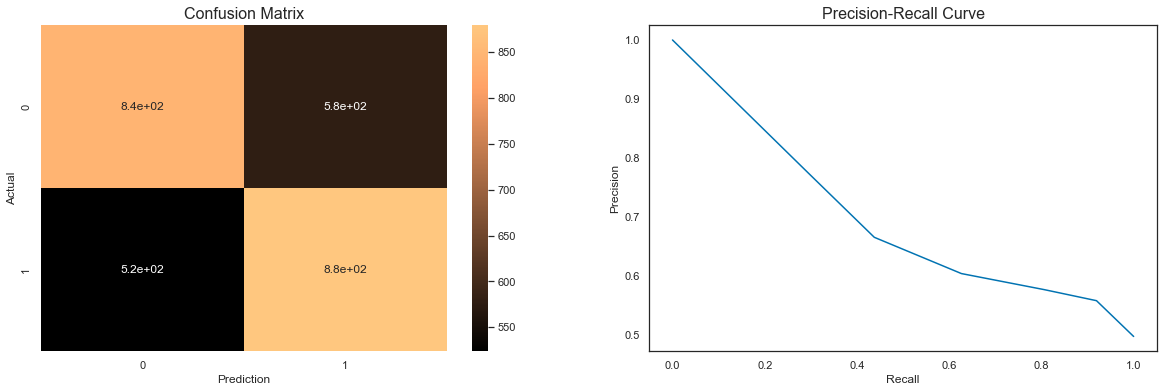

In [108]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn4, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn4 = classifier_knn4.predict_proba(X_pca_test_os)[:, 1]
precision_knn4, recall_knn4, _ = precision_recall_curve(y_test_scaled_os, y_score_knn4)
ax[1].plot(recall_knn4, precision_knn4)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [109]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the PCA oversampled scenario is ' + str(auc(recall_knn4, precision_knn4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the PCA oversampled scenario is 0.6968493593193472.


### _Comparing results and tuning hyperparameters_

In [110]:
# Comparing all AUC results

auc_df = pd.Series({'auc_rfc': auc(recall_rfc, precision_rfc), 'auc_knn': auc(recall_knn, precision_knn), 'auc_rfc1': auc(recall_rfc1, precision_rfc1), 'auc_knn1': auc(recall_knn1, precision_knn1), 'auc_rfc2': auc(recall_rfc2, precision_rfc2), 'auc_knn2': auc(recall_knn2, precision_knn2), 'auc_rfc3': auc(recall_rfc3, precision_rfc3), 'auc_knn3': auc(recall_knn3, precision_knn3), 'auc_rfc4': auc(recall_rfc4, precision_rfc4), 'auc_knn4': auc(recall_knn4, precision_knn4)})
auc_df.sort_values(ascending = False)

auc_rfc     0.996972
auc_knn2    0.993596
auc_knn     0.993264
auc_rfc2    0.993109
auc_rfc1    0.991329
auc_knn1    0.988379
auc_knn4    0.696849
auc_rfc4    0.693564
auc_rfc3    0.641341
auc_knn3    0.640928
dtype: float64

In [111]:
# Creating the parameter grid based on the results of grid search 

param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

classifier_rfc_CV = GridSearchCV(estimator = classifier_rfc, param_grid = param_grid, scoring = auc, n_jobs = -1, verbose = 2)
classifier_rfc_CV.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring=<function auc at 0x000001DCA44F35E0>, verbose=2)

In [112]:
# Finding best parameters

classifier_rfc_CV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 100}

In [113]:
# Training the model on the training set (not scaled or resampled dataset)

classifier_rfc_CV_final = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', n_estimators = 100, random_state = 42)
classifier_rfc_CV_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [114]:
# Predicting the test set results

y_pred_rfc_CV_final = classifier_rfc_CV_final.predict(X_test)
print(np.concatenate((y_pred_rfc_CV_final.reshape(len(y_pred_rfc_CV_final),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [115]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc_CV_final = confusion_matrix(y_test, y_pred_rfc_CV_final)
print('Confusion Matrix:')
print(cm_rfc_CV_final)
print()
print('The accuracy of the Random Forest Classifier model with GridSearch parameters is ' + str(accuracy_score(y_test, y_pred_rfc_CV_final)) + '.')

Confusion Matrix:
[[1396   29]
 [   2  154]]

The accuracy of the Random Forest Classifier model with GridSearch parameters is 0.9803921568627451.


In [116]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_rfc_CV_final, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99      1425
     Class 1       0.84      0.99      0.91       156

    accuracy                           0.98      1581
   macro avg       0.92      0.98      0.95      1581
weighted avg       0.98      0.98      0.98      1581



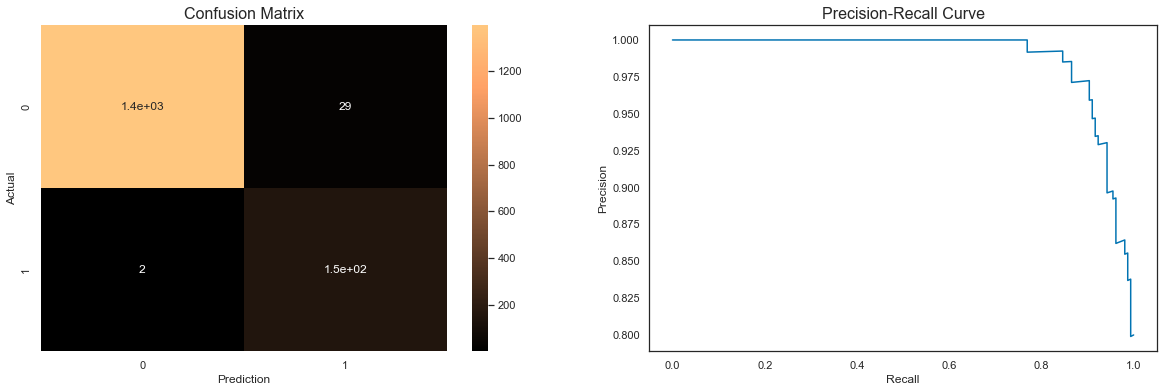

In [117]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc_CV_final, ax = ax[0], annot = True, cmap = plt.cm.copper)
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc_CV_final = classifier_rfc_CV_final.predict_proba(X_test)[:, 1]
precision_rfc_CV_final, recall_rfc_CV_final, _ = precision_recall_curve(y_test, y_score_rfc_CV_final)
ax[1].plot(recall_rfc_CV_final, precision_rfc_CV_final)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [118]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the scenario with no treatment and GridSearch parameters is ' + str(auc(recall_rfc_CV_final, precision_rfc_CV_final)) + '.')

The AUC for the Random Forest Classifier in the scenario with no treatment and GridSearch parameters is 0.9877596239571594.


# Evaluation

This dataset and report show the importance of the pre-processing steps in order to achieve excellent results in machine learning model predictions. Though it is mentioned by the authors Alzahrani and Sadaoui (2018a and 2018b) and Alzahrani (2019) all the difficulties they had to scrape and pre-process data about SB, they did an excellent work and there was not much left to be done before applying machine learning models.

As suspected, RF achieved its best result in the dataset without any treatments. It is important, however, to always execute tests and experiment with different techniques to observe all the outcomes and make a final decision. In this case, models were applied before and after the steps of scaling, balancing and reshaping the dataset using two different dimensionality reduction techniques. GridSearchCV it is also fundamental to help finding the best set of hyperparemeters in order to achieve not only higher scores, but more accurate and reliable ones.

Through the work of Alzahrani and Sadaoui (2018a and 2018b) and Alzahrani (2019) eBay and other e-commerce businesses have, now, knowledge, tools and techniques to detect suspicious activities and prevent cyber-crimes in online auctions.

# Reference List 

Alzahrani, A. (2019). Machine Learning for Shill Bidding Classification Models. [online] Available at: https://ourspace.uregina.ca/handle/10294/9162 [Accessed 19 May 22AD].

Alzahrani, A. and Sadaoui, S. (2018a). Clustering and Labelling Auction Fraud Data. [online] Research Gate. Available at: https://www.researchgate.net/publication/327173391_Clustering_and_Labelling_Auction_Fraud_Data [Accessed 8 May 2022].

Alzahrani, A. and Sadaoui, S. (2018b). Scraping and Preprocessing Commercial Auction Data for Fraud Classification. [online] Research Gate. Available at: https://www.researchgate.net/publication/325157684_Scraping_and_Preprocessing_Commercial_Auction_Data_for_Fraud_Classification [Accessed 8 May 2022].

Duff, I.S., Erisman, A.M. and Reid, J.K. (2017). Direct methods for sparse matrices. New York: Oxford University Press.

eBay. (n.d.). Auction Format. [online] Available at: https://www.ebay.ie/pages/help/sell/auction.html [Accessed 14 May 2022].

eBay. (n.d.). Shill Bidding Policy. [online] Available at: https://www.ebay.com/help/policies/selling-policies/selling-practices-policy/shill-bidding-policy?id=4353 [Accessed 9 May 2022].

Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. O’Reilly Media, Inc.
Harrison, M. (2019). Machine Learning Pocket Reference: Working with Structured Data in Python. O’reilly Media, Inc.

Mohammed, M., Badruddin Khan, M. and Mohammed Bashier, E.B. (2017). Machine Learning: Algorithms and Applications. CRC Press.

Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. O’Reilly Media, Inc.

Scikit-learn developers (2022). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/ [Accessed 10 May 2022].

Triola, M.F. (2012). Elementary Statistics. Iternational Edition ed. Boston: Pearson Education, Inc.

Vluymans, S. (2019). Dealing with Imbalanced and Weakly Labelled Data in Machine Learning using Fuzzy and Rough Set Methods. Springer.

Waskom, M. (2021). seaborn: statistical data visualization — seaborn 0.10.1 documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/index.html [Accessed 9 May 2022].

# Appendix 

## Data Dictionary

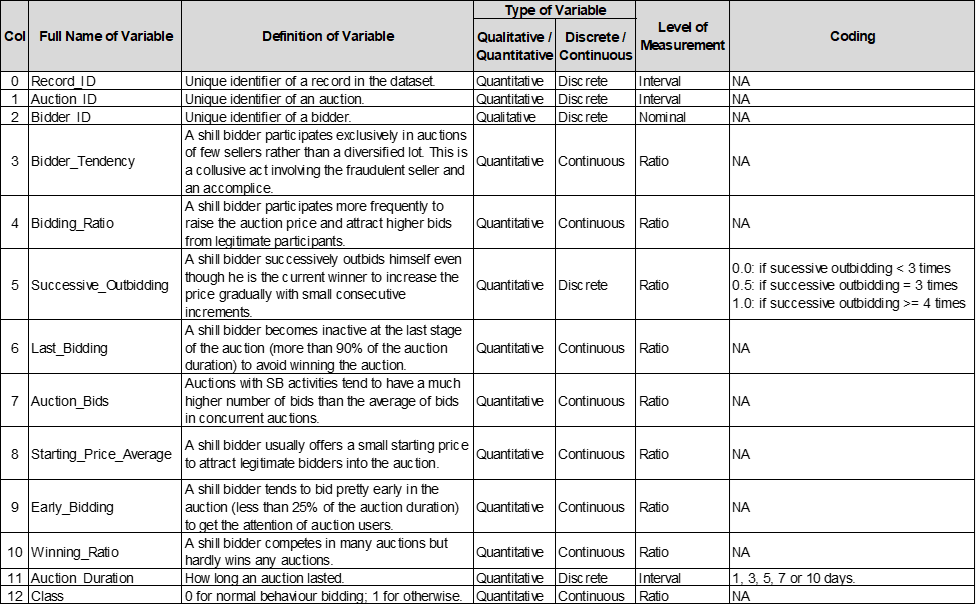